# <center>Customer Churn Analysis</center>

## Business Understanding<a class="anchor" id="Business Understanding"></a>

<i>Customer churn is a critical issue for subscription-based businesses, directly impacting revenue and profitability. Retaining existing customers is more cost-effective than acquiring new ones, making it essential to understand the drivers of churn. This dataset provides a comprehensive view of customer demographics, usage behavior, subscription details, and engagement levels, enabling businesses to gain actionable insights into churn trends. The goal is to use this information to identify at-risk customers, improve retention strategies, and foster long-term customer loyalty.</i>

#### This is for *Training Dataset*, I will copy and do the same for *Testing Dataset*

## Dataset Overview<a class="anchor" id="Dataset Overview"></a>

<i>Here is a column-wise description of the dataset:</i>

    1. Age: The age of the customer.
    2. Gender: The gender of the customer (e.g., Male, Female).
    3. Usage Frequency: The frequency with which the customer uses the service.
    4. Support Calls: The number of support calls made by the customer.
    5. Payment Delay: The number of days the customer delayed payment.
    6. Subscription Type: The type of subscription plan the customer is on (e.g., Basic, Standard, Premium).
    7. Contract Length: The duration of the subscription contract (e.g., Monthly, Quarterly, Annual).
    8. Total Spend: The total amount spent by the customer during their tenure.
    9. Last Interaction: The number of days since the customer’s last interaction with the service.
    10. Churn: A binary variable indicating if the customer has churned (1 for churn, 0 for retention).
    11. tenure_group: The tenure of the customer, categorized into ranges (e.g., 1-12 months, 25-36 months).

## <center>Exploratory Data Analysis<a class="anchor" id="Exploratory Data Analysis"></a></center>

### Data Cleaning & Processing<a class="anchor" id="Data Cleaning & Processing"></a>

In [48]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

In [49]:
main_df = pd.read_csv(r'original_data/customer_churn_dataset-training-master.csv') 
copy_df = main_df.copy()
copy_df.head(),copy_df.shape

(   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
 0         2.0  30.0  Female    39.0             14.0            5.0   
 1         3.0  65.0  Female    49.0              1.0           10.0   
 2         4.0  55.0  Female    14.0              4.0            6.0   
 3         5.0  58.0    Male    38.0             21.0            7.0   
 4         6.0  23.0    Male    32.0             20.0            5.0   
 
    Payment Delay Subscription Type Contract Length  Total Spend  \
 0           18.0          Standard          Annual        932.0   
 1            8.0             Basic         Monthly        557.0   
 2           18.0             Basic       Quarterly        185.0   
 3            7.0          Standard         Monthly        396.0   
 4            8.0             Basic         Monthly        617.0   
 
    Last Interaction  Churn  
 0              17.0    1.0  
 1               6.0    1.0  
 2               3.0    1.0  
 3              29.0    1.0  
 4    

In [50]:
copy_df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [51]:
copy_df = copy_df.dropna(how='all')
copy_df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [52]:
float_cols = copy_df.select_dtypes('float').columns.drop('Total Spend', errors='ignore')
copy_df[float_cols] = copy_df[float_cols].astype(int)

# Round 'Total Spend' and convert it to integer
copy_df['Total Spend'] = copy_df['Total Spend'].round().astype(int)

In [53]:
# Information of all features
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CustomerID         440832 non-null  int64 
 1   Age                440832 non-null  int64 
 2   Gender             440832 non-null  object
 3   Tenure             440832 non-null  int64 
 4   Usage Frequency    440832 non-null  int64 
 5   Support Calls      440832 non-null  int64 
 6   Payment Delay      440832 non-null  int64 
 7   Subscription Type  440832 non-null  object
 8   Contract Length    440832 non-null  object
 9   Total Spend        440832 non-null  int64 
 10  Last Interaction   440832 non-null  int64 
 11  Churn              440832 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 43.7+ MB


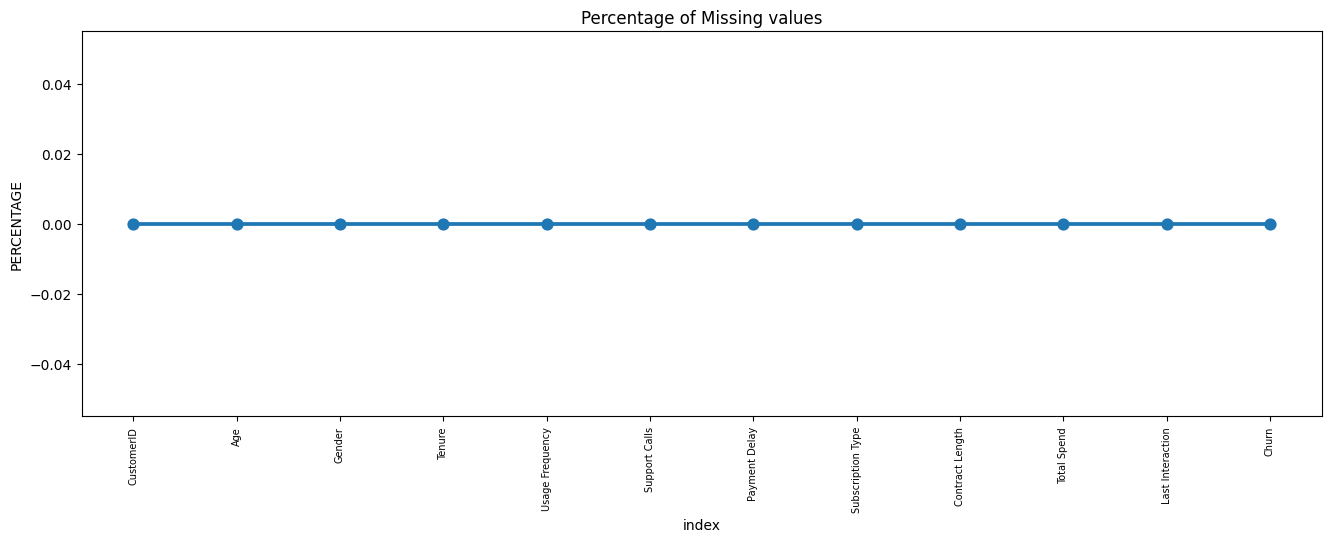

In [54]:
# Visual Representations of Checking Null Values
missing = pd.DataFrame((copy_df.isnull().sum())*100/copy_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(data = missing, x="index", y=0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<b>Here, we don't have any missing data</b>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Tenure'),
  Text(2, 0, 'Usage Frequency'),
  Text(3, 0, 'Support Calls'),
  Text(4, 0, 'Payment Delay'),
  Text(5, 0, 'Total Spend'),
  Text(6, 0, 'Last Interaction'),
  Text(7, 0, 'Churn')])

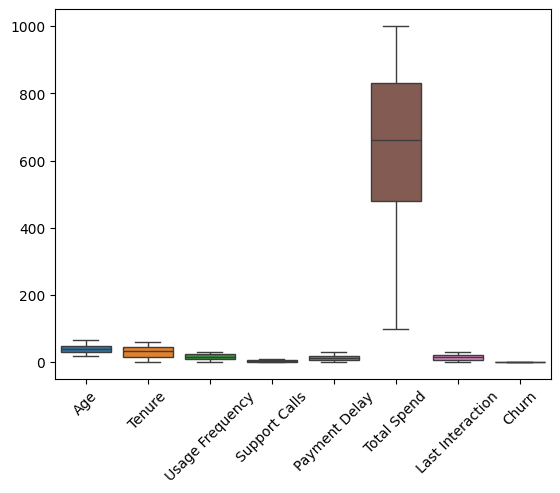

In [55]:
# Outlier Detection
outlier_df = copy_df.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
sns.boxplot(data=outlier_df)
plt.xticks(rotation=45)

<b>There are no outliers in any columns</b>

Text(0.5, 1.02, 'Count of TARGET Variable per category')

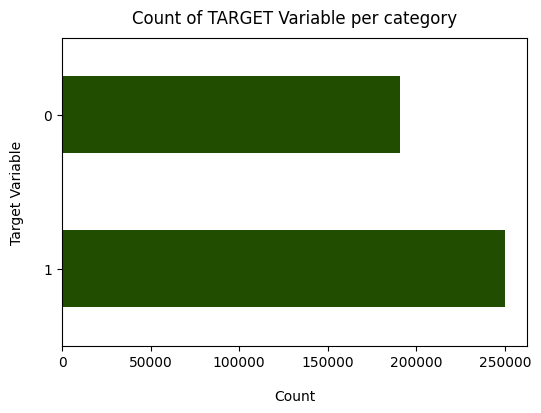

In [56]:
# Checking Balanced or Imbalanced Dataset
copy_df['Churn'].value_counts().plot(kind='barh', color="#204D00", figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [57]:
# Percentage of Churned Customers and not Churned Customers
100*copy_df['Churn'].value_counts()/len(copy_df['Churn'])

Churn
1    56.71072
0    43.28928
Name: count, dtype: float64

<b> The total customers are <i>440832</i>. From here, <i>190833</i> are not churned customers and <i>249999</i> are . </b>
1. So, we can say that <b>43.28%</b> customers are not churned and <b>56.71%</b> customers are  churned
2. The dataset is highly balanced and the ration is <b>57:43</b>

In [58]:
# Checking which feature/column should be converted into Bins
for column in copy_df.columns:
    print(f'{column} =>', copy_df[column].value_counts().shape)

CustomerID => (440832,)
Age => (48,)
Gender => (2,)
Tenure => (60,)
Usage Frequency => (30,)
Support Calls => (11,)
Payment Delay => (31,)
Subscription Type => (3,)
Contract Length => (3,)
Total Spend => (901,)
Last Interaction => (30,)
Churn => (2,)


The <b>CustomerID</b> column has the highest number of distinct values; however, it is not relevant for the analysis and will be dropped later. Additionally, the <b>Age</b> column contains 48 distinct values, which can be considered for binning, though this will be addressed at a later stage. The <b>Tenure</b> column contains 60 distinct values, which can make analysis and visualization challenging. To address this, we can group the data into 4-5 bins. Binning these values will simplify the analysis and enhance the clarity of data visualization

In [59]:
# Binning => Tenure
max_val = copy_df['Tenure'].max()
min_val = copy_df['Tenure'].min()
labels = ["{0} - {1}".format(i, i + 11) for i in range(min_val, max_val, 12)]
copy_df['tenure_group'] = pd.cut(copy_df.Tenure, range(min_val, max_val+10, 12), right=False, labels=labels)
copy_df['tenure_group'].value_counts()

tenure_group
49 - 60    92331
37 - 48    91932
25 - 36    91473
1 - 12     85129
13 - 24    79967
Name: count, dtype: int64

In [60]:
copy_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group
0,2,30,Female,39,14,5,18,Standard,Annual,932,17,1,37 - 48
1,3,65,Female,49,1,10,8,Basic,Monthly,557,6,1,49 - 60
2,4,55,Female,14,4,6,18,Basic,Quarterly,185,3,1,13 - 24
3,5,58,Male,38,21,7,7,Standard,Monthly,396,29,1,37 - 48
4,6,23,Male,32,20,5,8,Basic,Monthly,617,20,1,25 - 36


In [61]:
# Dropping CustomerID & Tenure Columns
copy_df.drop(['CustomerID', 'Tenure'], axis=1, inplace=True)

In [62]:
copy_df.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group
0,30,Female,14,5,18,Standard,Annual,932,17,1,37 - 48
1,65,Female,1,10,8,Basic,Monthly,557,6,1,49 - 60
2,55,Female,4,6,18,Basic,Quarterly,185,3,1,13 - 24
3,58,Male,21,7,7,Standard,Monthly,396,29,1,37 - 48
4,23,Male,20,5,8,Basic,Monthly,617,20,1,25 - 36


We have successfully completed the Data Cleaning and Preprocessing phase and will now proceed with the data analysis part.

### Statistical Analysis<a class="anchor" id="Statistical Analysis"></a>

In [63]:
# Overall statistical results
copy_df.describe()

,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,15.807494,3.604437,12.965722,631.616620,14.480868,0.567107
std,12.442369,8.586242,3.070218,8.258063,240.803574,8.596208,0.495477
min,18.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


#### Insights
1. The highest age is 65, the lowest is 18, and the average age is 39. Most people (75th percentile) are aged up to 48.
2. On average, there are 3.6 support calls.
3. The longest payment delay is 30 days.
4. Total spending ranges from 100 to 1000, with an average of 631.
5. Usage frequency varies from 1 to 30, with an average of 14.

### Univariate Analysis<a class="anchor" id="Univariate Analysis"></a>
<i>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.</i>

In [64]:
# set our charts' colors
color = ["#00876c", "#6b9c72", "#a3b088", "#cec6ad", "#cda376", "#d37755", "#d43d51"]

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\2014421057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=copy_df, x="Age", palette=color)
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\2014421057.py:2: UserWarning: 
The palette list has fewer values (7) than needed (48) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=copy_df, x="Age", palette=color)


<Axes: xlabel='Age', ylabel='count'>

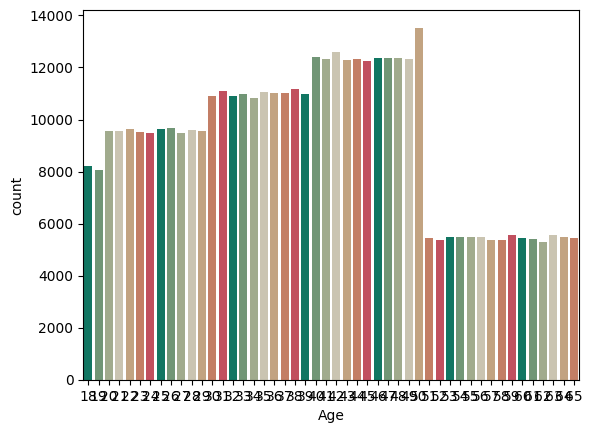

In [65]:
# Univariate Analysis of Age Column
sns.countplot(data=copy_df, x="Age", palette=color)

From this point, it is evident that the Age column values should be grouped into bins

In [66]:
# Binning => Age (This part is Data Processing Part)
max_val = copy_df['Age'].max()
min_val = copy_df['Age'].min()
labels = ["{0} - {1}".format(i, i + 11) for i in range(min_val, max_val, 12)]
copy_df['Age_group'] = pd.cut(copy_df.Age, range(min_val, max_val+10, 12), right=False, labels=labels)
copy_df['Age_group'].value_counts()

Age_group
30 - 41    134693
42 - 53    128727
18 - 29    112026
54 - 65     65386
Name: count, dtype: int64

In [67]:
copy_df.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group,Age_group
0,30,Female,14,5,18,Standard,Annual,932,17,1,37 - 48,30 - 41
1,65,Female,1,10,8,Basic,Monthly,557,6,1,49 - 60,54 - 65
2,55,Female,4,6,18,Basic,Quarterly,185,3,1,13 - 24,54 - 65
3,58,Male,21,7,7,Standard,Monthly,396,29,1,37 - 48,54 - 65
4,23,Male,20,5,8,Basic,Monthly,617,20,1,25 - 36,18 - 29


In [68]:
# Dropping Age column
copy_df.drop("Age", axis=1, inplace=True)

In [69]:
copy_df.head()

,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group,Age_group
0,Female,14,5,18,Standard,Annual,932,17,1,37 - 48,30 - 41
1,Female,1,10,8,Basic,Monthly,557,6,1,49 - 60,54 - 65
2,Female,4,6,18,Basic,Quarterly,185,3,1,13 - 24,54 - 65
3,Male,21,7,7,Standard,Monthly,396,29,1,37 - 48,54 - 65
4,Male,20,5,8,Basic,Monthly,617,20,1,25 - 36,18 - 29


C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\2454301339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=copy_df, x="Age_group", palette=color)
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\2454301339.py:2: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=copy_df, x="Age_group", palette=color)


<Axes: xlabel='Age_group', ylabel='count'>

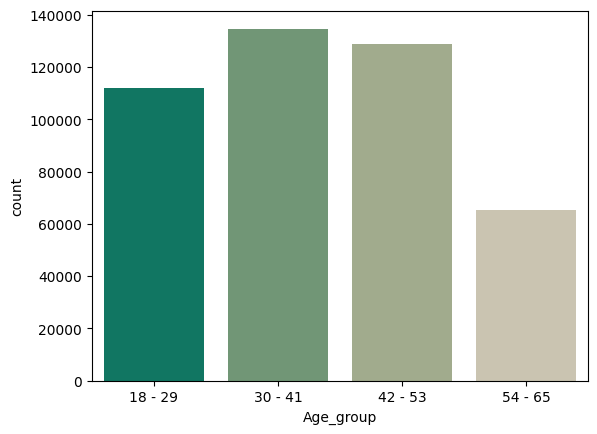

In [70]:
# Univariate Analysis of Age Column
sns.countplot(data=copy_df, x="Age_group", palette=color)

<b>In our dataset, the age ranges from 18 to 65, with a higher proportion of people aged between 30 and 41.</b>

In [71]:
# Function of donut chart
def create_donut(sizes, labels, ax):
    ax.pie(
        sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=color, 
        wedgeprops={'width': 0.4}  # Width controls the donut shape
    )

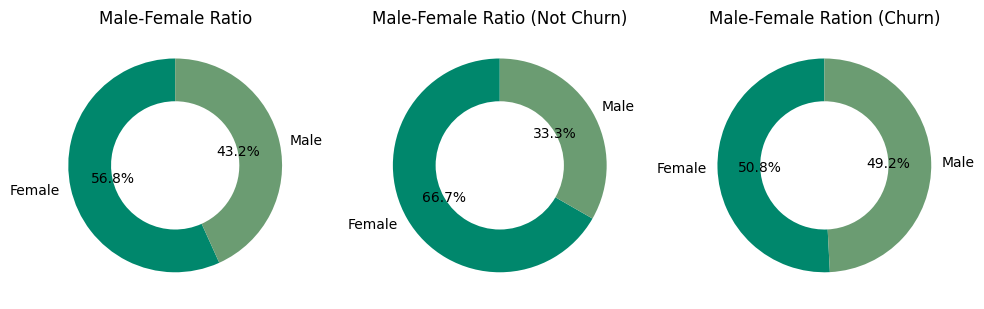

In [72]:
# Univariate Analysis of Gender 
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Gender"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Gender"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Gender"].value_counts(), copy_df["Gender"].unique(), axes[0])
create_donut(x["Gender"].value_counts(), x["Gender"].unique() , axes[1])
create_donut(y["Gender"].value_counts(), y["Gender"].unique(), axes[2])

# Set titles
axes[0].set_title('Male-Female Ratio')
axes[1].set_title('Male-Female Ratio (Not Churn)')
axes[2].set_title('Male-Female Ration (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

#### Insights
1. In our dataset <b>56.8%</b> are <b>Female</b> and <b>43.2%</b> are <b>Male</b>
2. <b>Female</b> are more likely to churn than <b>Male</b>.

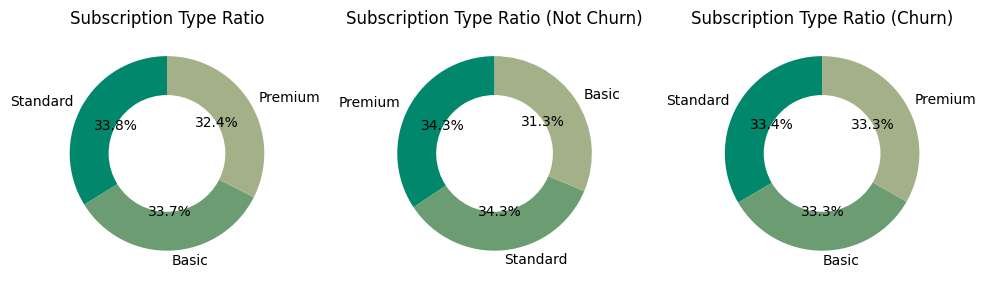

In [73]:
# Univariate Analysis of Subscription Type 
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Subscription Type"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Subscription Type"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Subscription Type"].value_counts(), copy_df["Subscription Type"].unique(), axes[0])
create_donut(x["Subscription Type"].value_counts(), x["Subscription Type"].unique() , axes[1])
create_donut(y["Subscription Type"].value_counts(), y["Subscription Type"].unique(), axes[2])

# Set titles
axes[0].set_title('Subscription Type Ratio')
axes[1].set_title('Subscription Type Ratio (Not Churn)')
axes[2].set_title('Subscription Type Ratio (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

<b>Subscription Type has almost no impact on customer churn.</b>

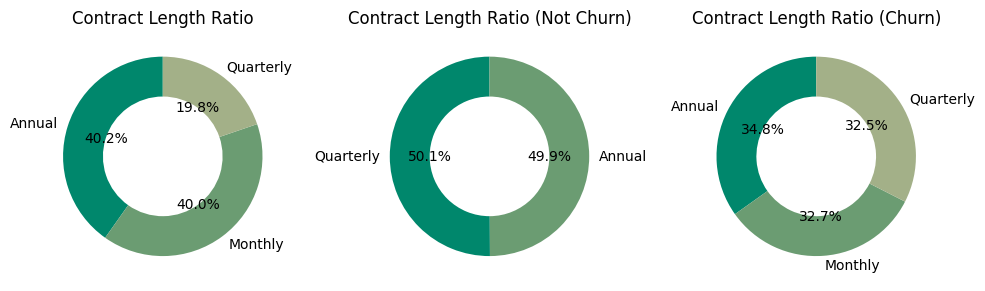

In [74]:
# Univariate Analysis of Contract Length 
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Contract Length"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Contract Length"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Contract Length"].value_counts(), copy_df["Contract Length"].unique(), axes[0])
create_donut(x["Contract Length"].value_counts(), x["Contract Length"].unique() , axes[1])
create_donut(y["Contract Length"].value_counts(), y["Contract Length"].unique(), axes[2])

# Set titles
axes[0].set_title('Contract Length Ratio')
axes[1].set_title('Contract Length Ratio (Not Churn)')
axes[2].set_title('Contract Length Ratio (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

Customers with Annual contracts churn less, while Monthly and Quarterly contracts have higher churn rates. This suggests long-term contracts improve retention, while shorter contracts may need engagement strategies.

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\1531589632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=copy_df, x="Usage Frequency", palette=color)
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\1531589632.py:3: UserWarning: 
The palette list has fewer values (7) than needed (30) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=copy_df, x="Usage Frequency", palette=color)


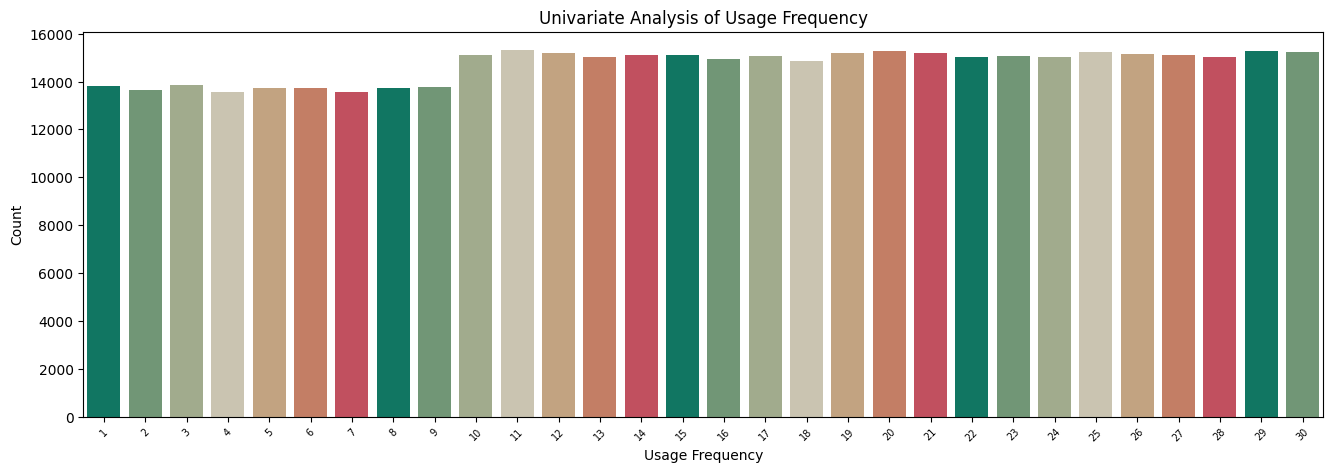

In [75]:
# Univariate Analysis of Usage Frequency
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Usage Frequency", palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Univariate Analysis of Usage Frequency")
plt.ylabel("Count")
plt.show()

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\688676939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=copy_df, x="Payment Delay", palette=color)
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\688676939.py:3: UserWarning: 
The palette list has fewer values (7) than needed (31) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=copy_df, x="Payment Delay", palette=color)


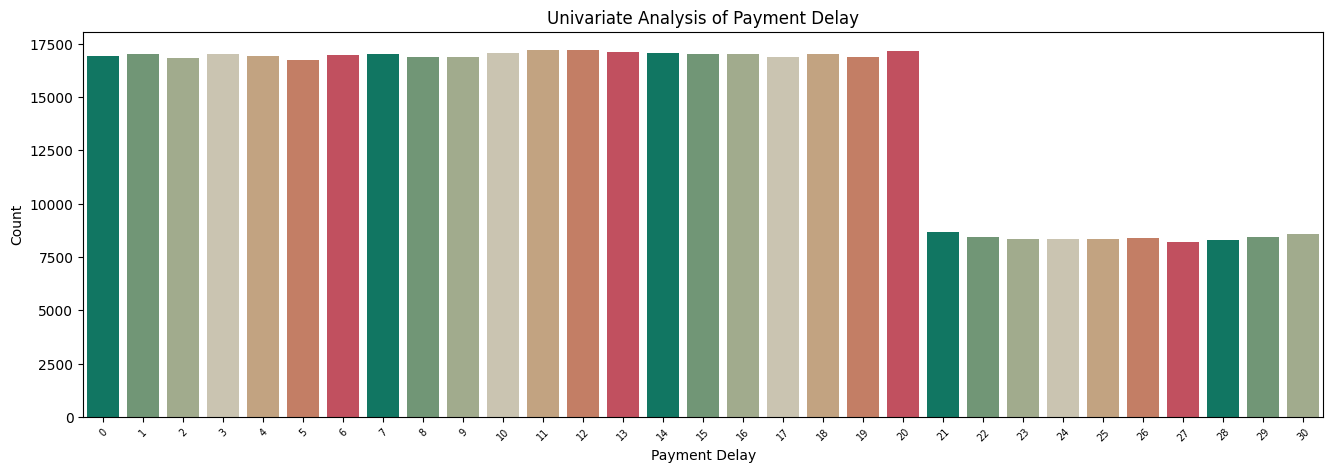

In [76]:
# Univariate Analysis of Payment Delay
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Payment Delay", palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Univariate Analysis of Payment Delay")
plt.ylabel("Count")
plt.show()

<b>Maximum people's payment delay lies in the range 0 to 20 days.</b>

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\185275973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=copy_df, x="tenure_group", palette=color)
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\185275973.py:3: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  ax = sns.countplot(data=copy_df, x="tenure_group", palette=color)


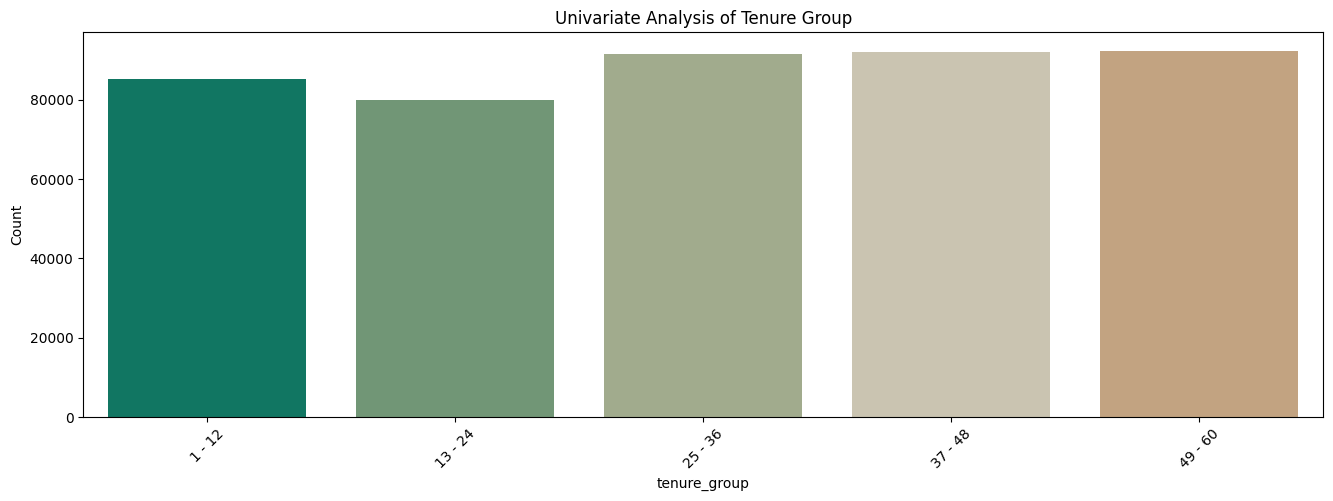

In [77]:
# Univariate Analysis of Tenure 
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="tenure_group", palette=color)
plt.xticks(rotation =45)
plt.title("Univariate Analysis of Tenure Group")
plt.ylabel("Count")
plt.show()

The tenure groups <b>25-36</b>, <b>37-48</b>, and <b>49-60</b> have the highest customer counts, indicating longer customer retention.

###  Bivariate Analysis<a class="anchor" id="Bivariate Analysis"></a>
Bivariate analysis explores the relationship between two variables to identify insights

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\846789281.py:4: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=copy_df, x=predictor, hue='Churn', palette=color)
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\846789281.py:4: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=copy_df, x=predictor, hue='Churn', palette=color)
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\846789281.py:4: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=copy_df, x=predictor, hue='Churn', palette=color)
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\846789281.py:4: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=copy_df, x=predictor, hue='Churn', palette=color)
C:\Users\Kshitish Pandit\AppData\Local\T

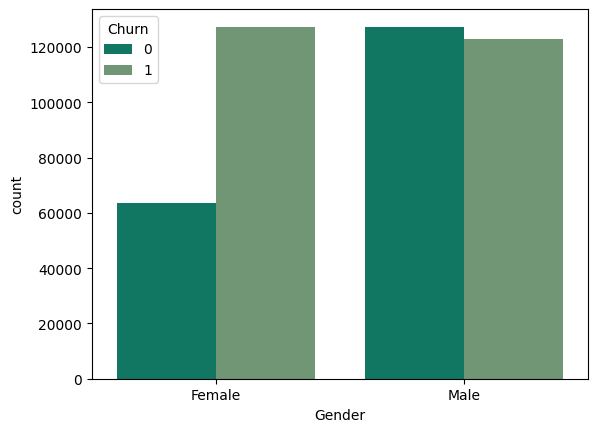

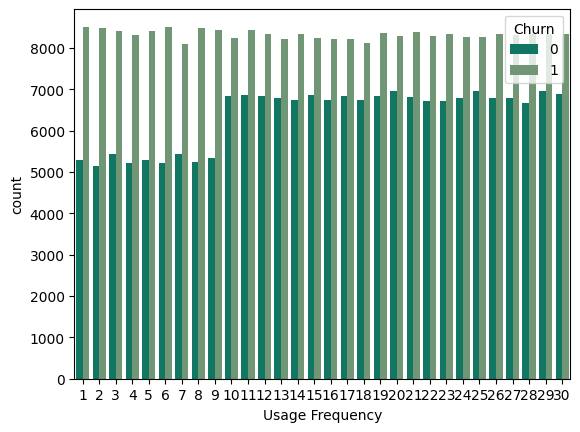

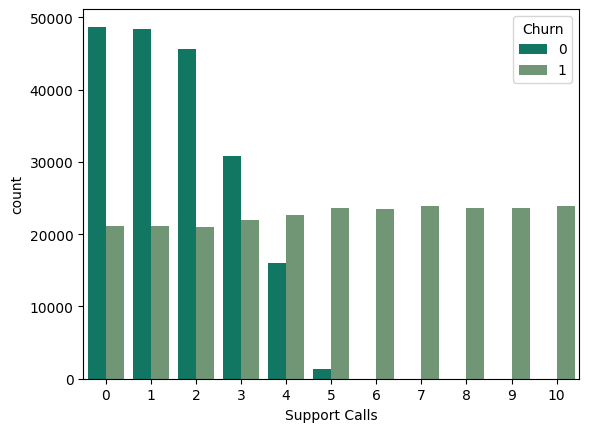

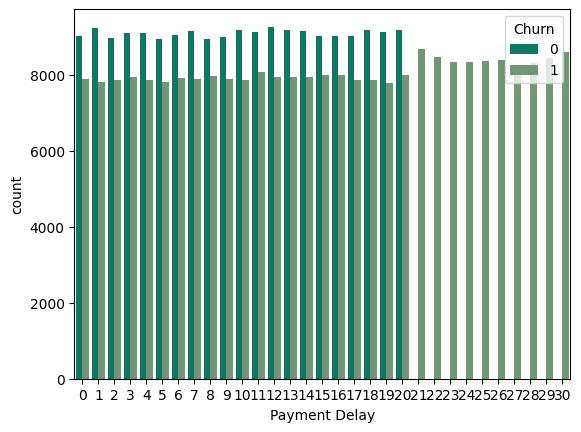

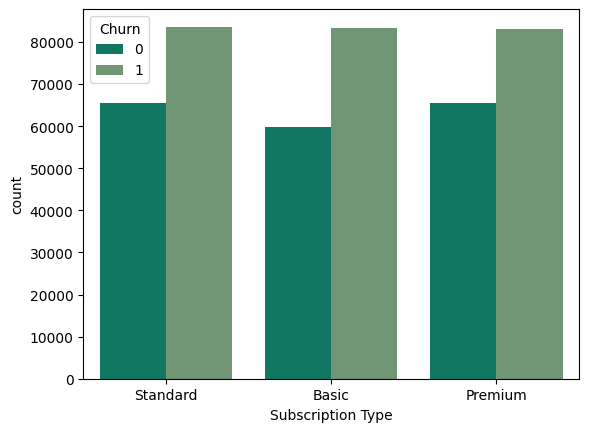

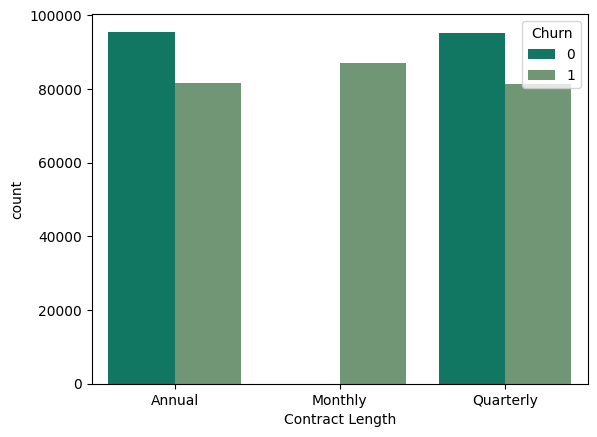

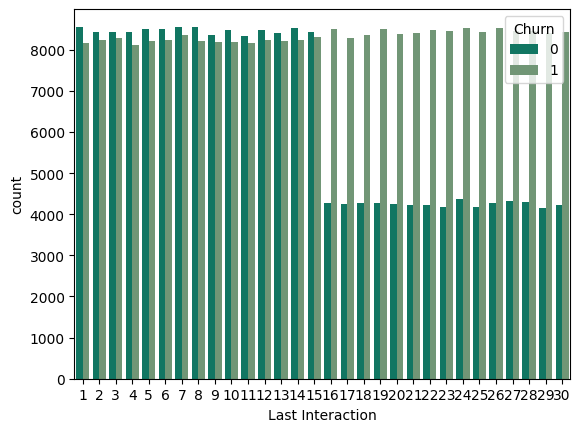

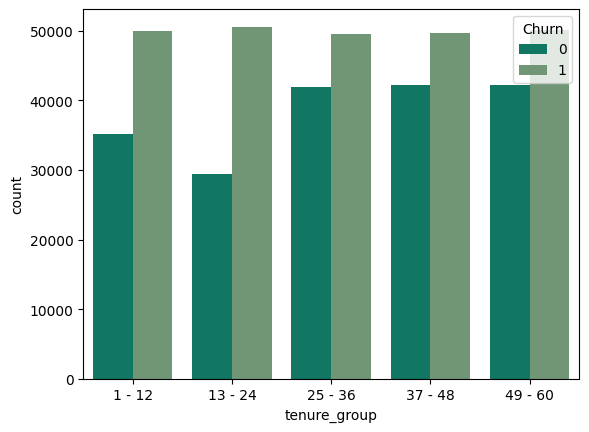

In [78]:
color = ["#00876c", "#6b9c72", "#a3b088", "#cec6ad", "#cda376", "#d37755", "#d43d51"]
for i, predictor in enumerate(copy_df.drop(columns=['Churn', 'Total Spend', 'Age_group'])):
    plt.figure(i)
    sns.countplot(data=copy_df, x=predictor, hue='Churn', palette=color)

From above charts we can see that we should re-plot <b>Usage Frequency</b>, <b>Payment Delay</b>, and <b>Last Interaction</b> for better analysis.

<b>Insights</b> 
1. <b>Female</b> are slightly more likely to churn than <b>Male,</b> but difference in <b> Male</b> churning and not churning is very low.
3. Where <b>support calls</b> are <b>less than 5</b>, we found the churn rate is <b>low</b>.
4. Where <b>support calls</b> are <b>greater than or equal to 5</b>, we found the churn rate is <b>high</b> but slightly.
5. <b>Subscription Type</b> has <b>no impact</b> on customer churn.
6. <b>Monthly Contract length</b> has <b>high rate</b> of churning than others as it has no unchurned customers.
7. <b>Similar</b> churn is seen in all <b>Tenure ranges</b>.

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\1785716867.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(copy_df["Support Calls"][(copy_df["Churn"] == 0)],
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\1785716867.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(copy_df["Support Calls"][(copy_df["Churn"] == 1)],


Text(0.5, 1.0, 'Support Calls by churn')

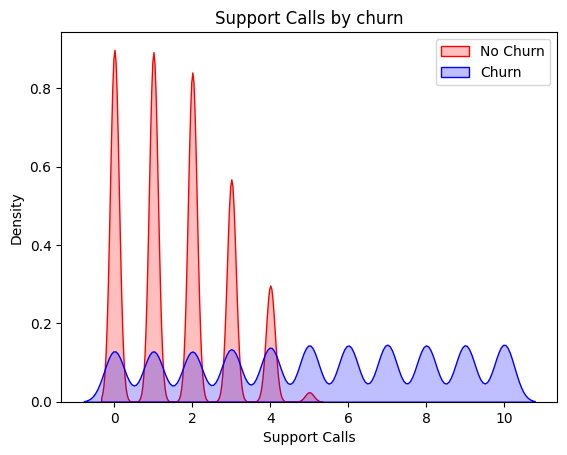

In [79]:
# Kde Plot of Support Calls (Doing again Bivariate Analysis for better understanding using KDE)
Tot = sns.kdeplot(copy_df["Support Calls"][(copy_df["Churn"] == 0)],
                color="Red", shade = True)
Tot = sns.kdeplot(copy_df["Support Calls"][(copy_df["Churn"] == 1)],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Support Calls')
Tot.set_title('Support Calls by churn')

<b>Customers who don’t churn (red) mostly make fewer support calls (0-4), whereas churned customers (blue) tend to make more calls, with density increasing as calls rise. This indicates that high support call frequency may signal frustration, leading to churn.</b>

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\4216120862.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(copy_df["Total Spend"][(copy_df["Churn"] == 0)],
C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\4216120862.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(copy_df["Total Spend"][(copy_df["Churn"] == 1)],


Text(0.5, 1.0, 'Total Spend by churn')

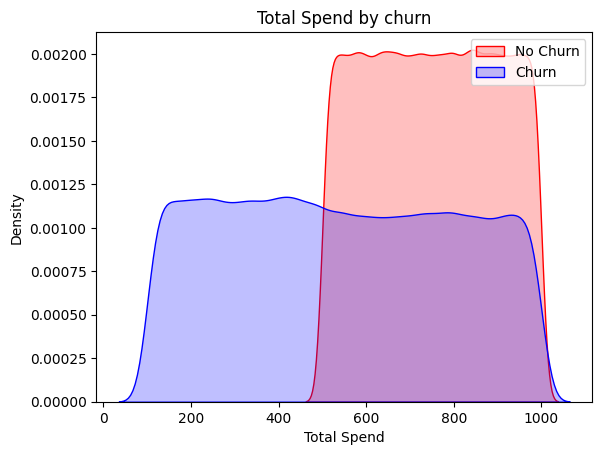

In [80]:
# Bivariate Analysis of Total Spend by using KDE 
Tot = sns.kdeplot(copy_df["Total Spend"][(copy_df["Churn"] == 0)],
                color="Red", shade = True)
Tot = sns.kdeplot(copy_df["Total Spend"][(copy_df["Churn"] == 1)],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Spend')
Tot.set_title('Total Spend by churn')

<b>Customers with lower total spend (0-600) are more likely to churn (blue), while those with higher total spend (600-1000) tend to stay (red). This suggests that higher spenders are more loyal, while lower spenders are more likely to leave.</b>

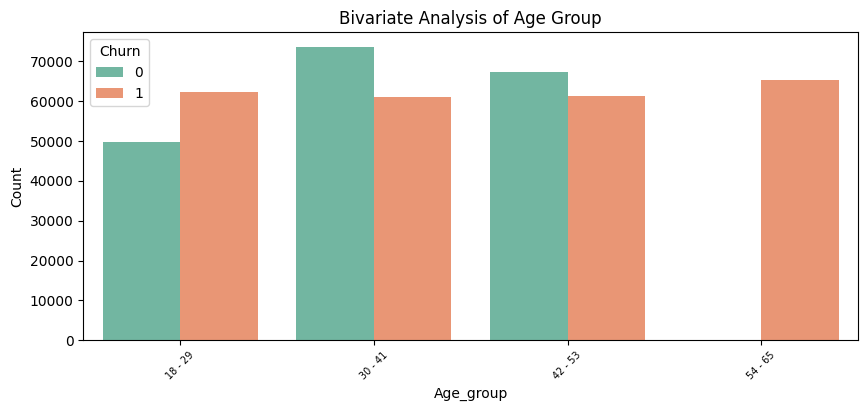

In [81]:
# Bivariate Analysis of Age group
plt.figure(figsize=(10,4))
ax = sns.countplot(data=copy_df, x="Age_group", hue='Churn', palette = "Set2")
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Age Group")
plt.ylabel("Count")
plt.show()

All costumer who are <b>above 53</b> are retented but <b>younger</b> people have a almost similar rate of rentented and non-retented customers 

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\2343584303.py:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax = sns.countplot(data=copy_df, x="Usage Frequency", hue='Churn', palette=color)


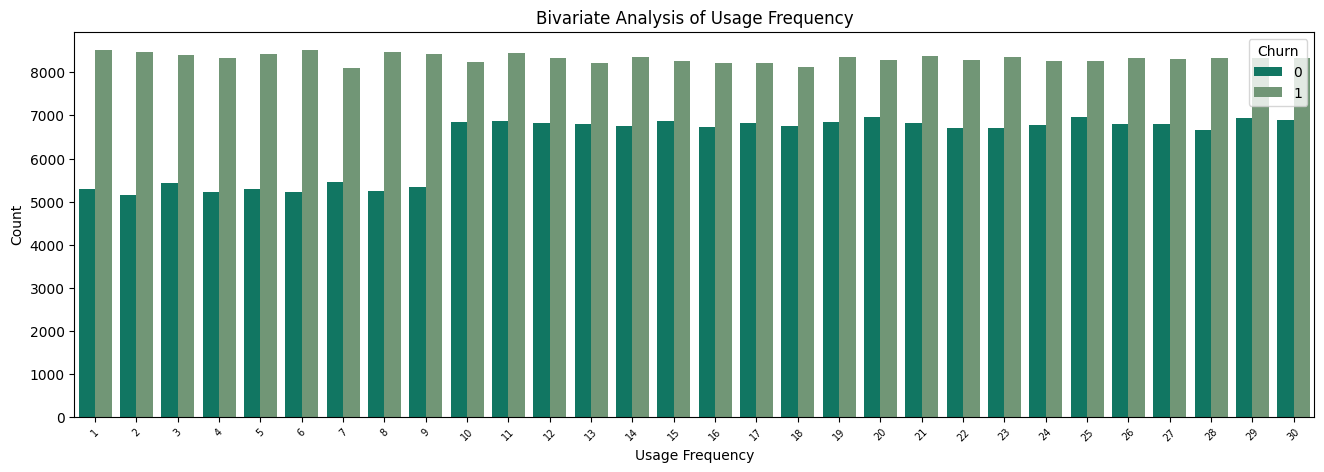

In [82]:
# Bivariate Analysis of Usage Frequency
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Usage Frequency", hue='Churn', palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Usage Frequency")
plt.ylabel("Count")
plt.show()

<b>Those people who use the service very less amount of time (<=5) have a greater tendency to churn than who use the service much.</b>

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\3511039729.py:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax = sns.countplot(data=copy_df, x="Payment Delay", hue='Churn', palette=color)


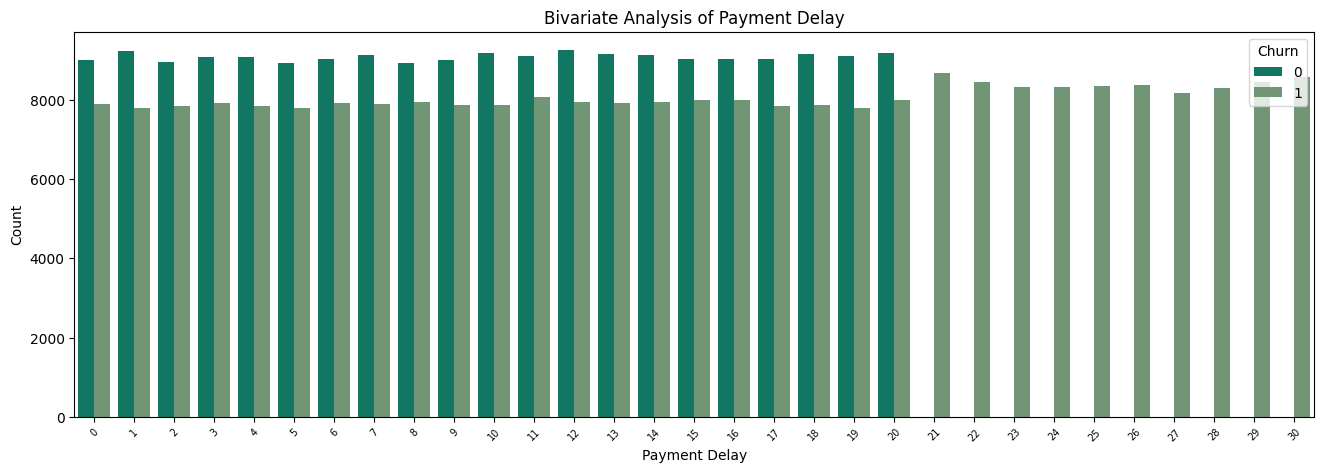

In [83]:
# Biivariate Analysis of Payment Delay
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Payment Delay", hue='Churn', palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Payment Delay")
plt.ylabel("Count")
plt.show()

<b>Those who has high payment delay (more than 20 days) are more likely to churn than less payment delay.</b>

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_9096\423107675.py:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax = sns.countplot(data=copy_df, x="Last Interaction", hue='Churn', palette=color)


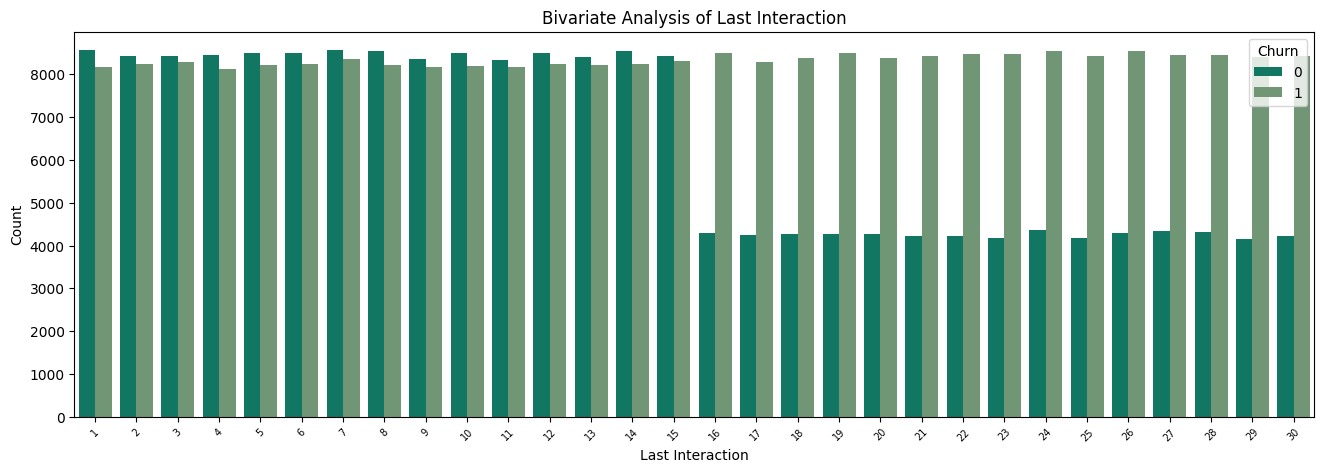

In [84]:
# Biivariate Analysis of Last Interaction
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Last Interaction", hue='Churn', palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Last Interaction")
plt.ylabel("Count")
plt.show()

<b>People's last interaction has some  impact on customer churn, as the rate is higher after 15 days of interaction.</b>

In [85]:
new_df1_target0=copy_df.loc[copy_df["Churn"]==0]
new_df1_target1=copy_df.loc[copy_df["Churn"]==1]

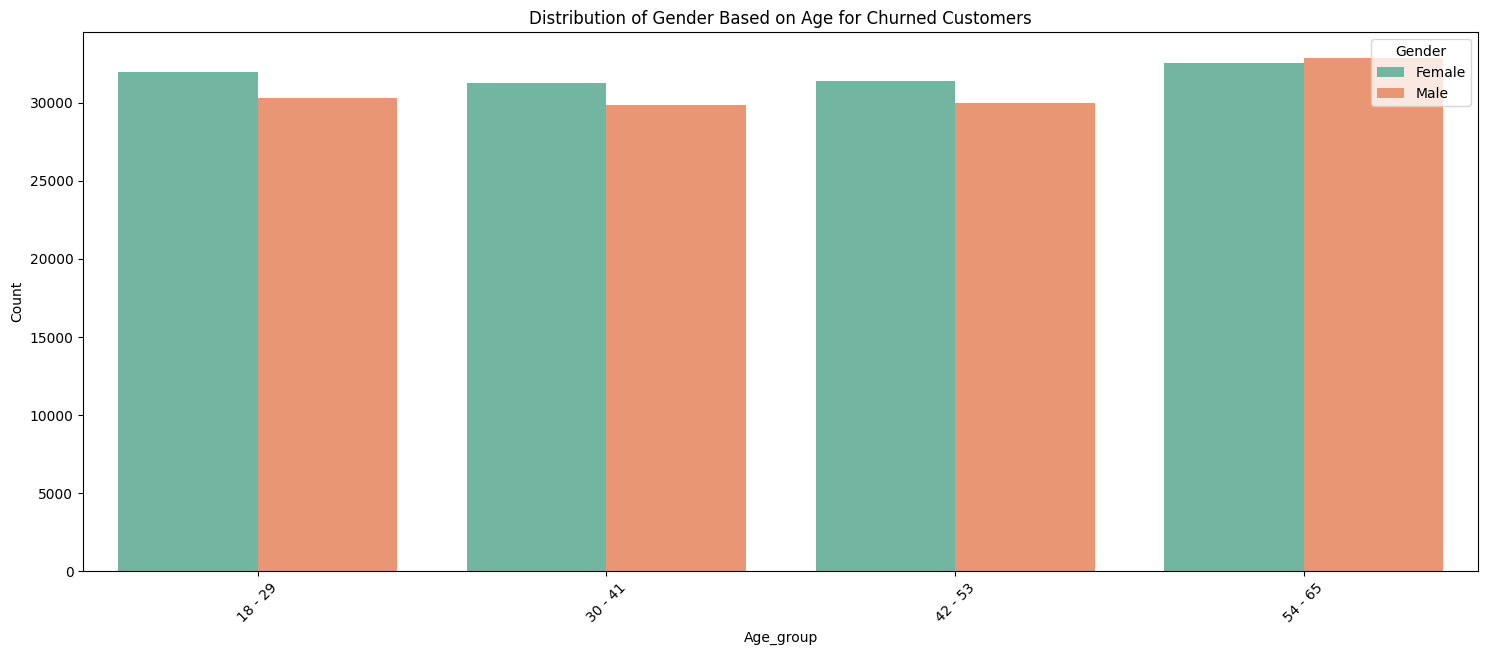

In [86]:
plt.figure(figsize=(18,7))
ax = sns.countplot(data=new_df1_target1, x="Age_group", hue='Gender', palette="Set2")
plt.xticks(rotation =45)
plt.title("Distribution of Gender Based on Age for Churned Customers")
plt.ylabel("Count")
plt.show()

<b>Churn rate is almost similar for male and female of all ages from the figure but female have a slightly higher rate consistently until age 544.</b>

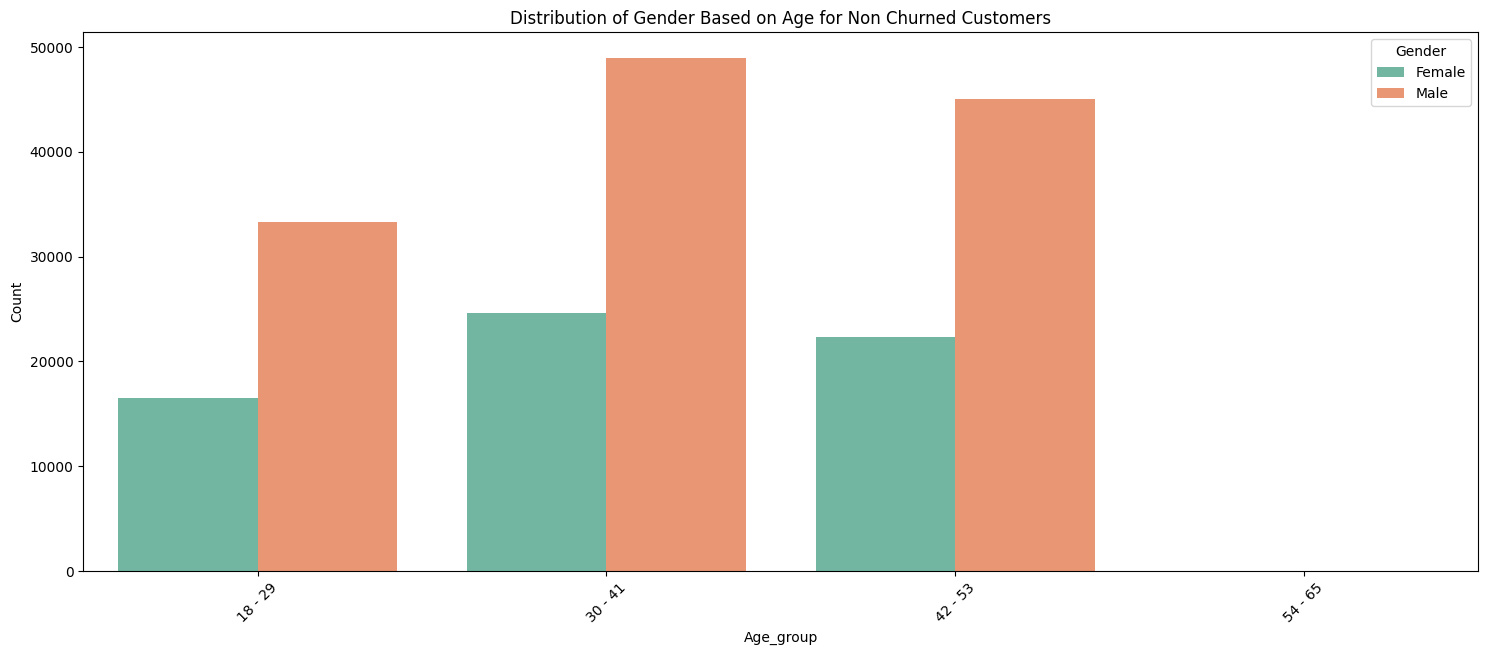

In [87]:
plt.figure(figsize=(18,7))
ax = sns.countplot(data=new_df1_target0, x="Age_group", hue='Gender', palette="Set2")
plt.xticks(rotation =45)
plt.title("Distribution of Gender Based on Age for Non Churned Customers")
plt.ylabel("Count")
plt.show()

<b>Younger people and especially male have a low tendency to churn out.</b>

### Feature Encoding<a class="anchor" id="Feature Encoding"></a>

In [88]:
# Convert all the categorical variables into dummy variables
copy_df_dummies = pd.get_dummies(copy_df)
copy_df_dummies.head()

,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,...,Contract Length_Quarterly,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,Age_group_18 - 29,Age_group_30 - 41,Age_group_42 - 53,Age_group_54 - 65
0,14,5,18,932,17,1,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,1,10,8,557,6,1,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
2,4,6,18,185,3,1,True,False,True,False,...,True,False,True,False,False,False,False,False,False,True
3,21,7,7,396,29,1,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,20,5,8,617,20,1,False,True,True,False,...,False,False,False,True,False,False,True,False,False,False


<Axes: >

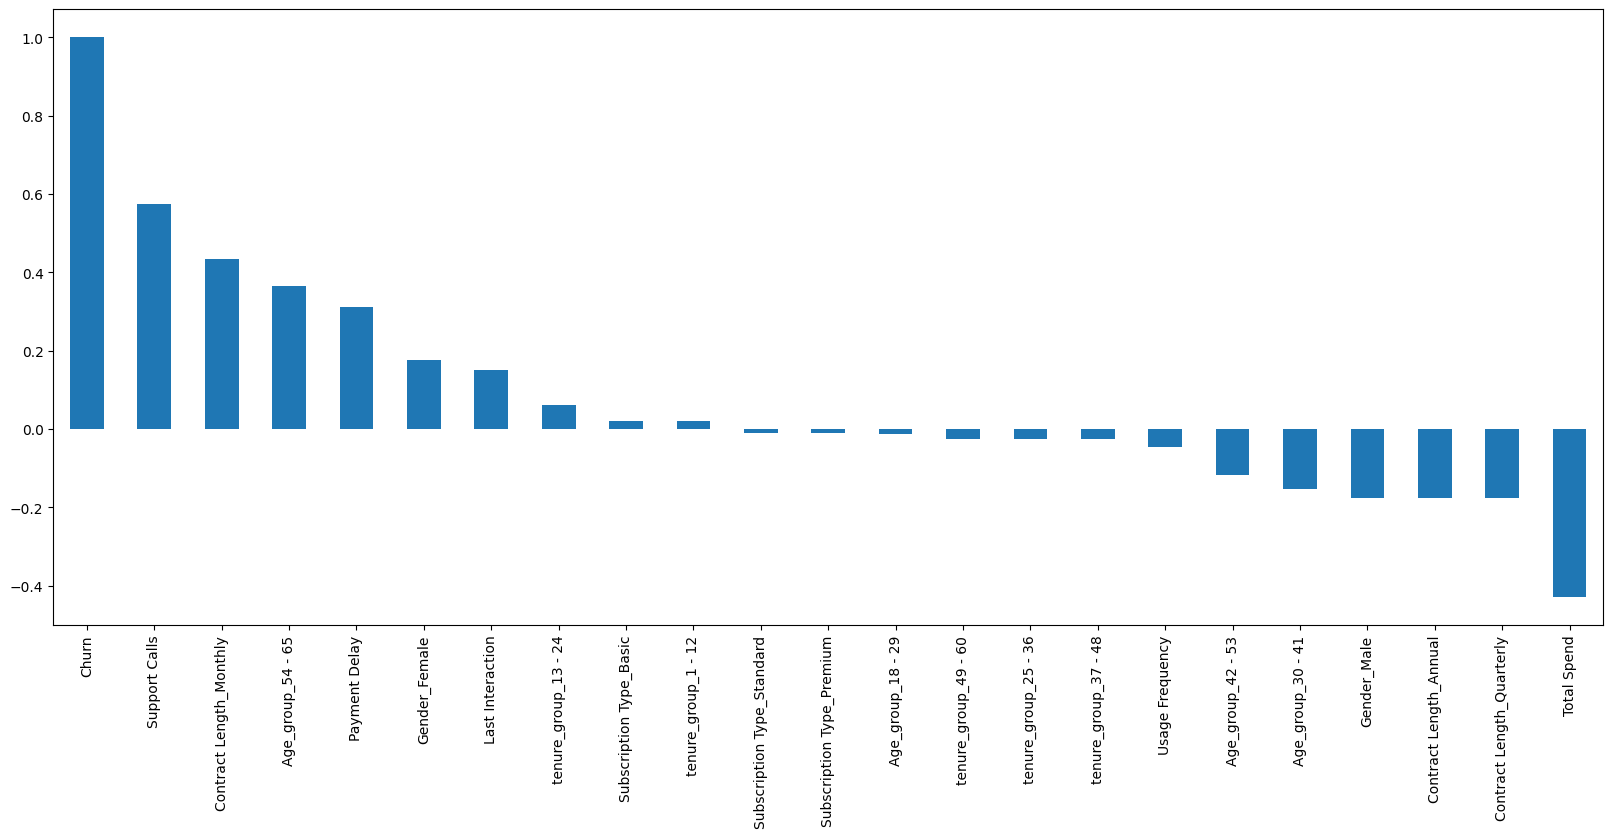

In [89]:
# Build a corelation of all predictors with 'Churn'
plt.figure(figsize=(20,8))
copy_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

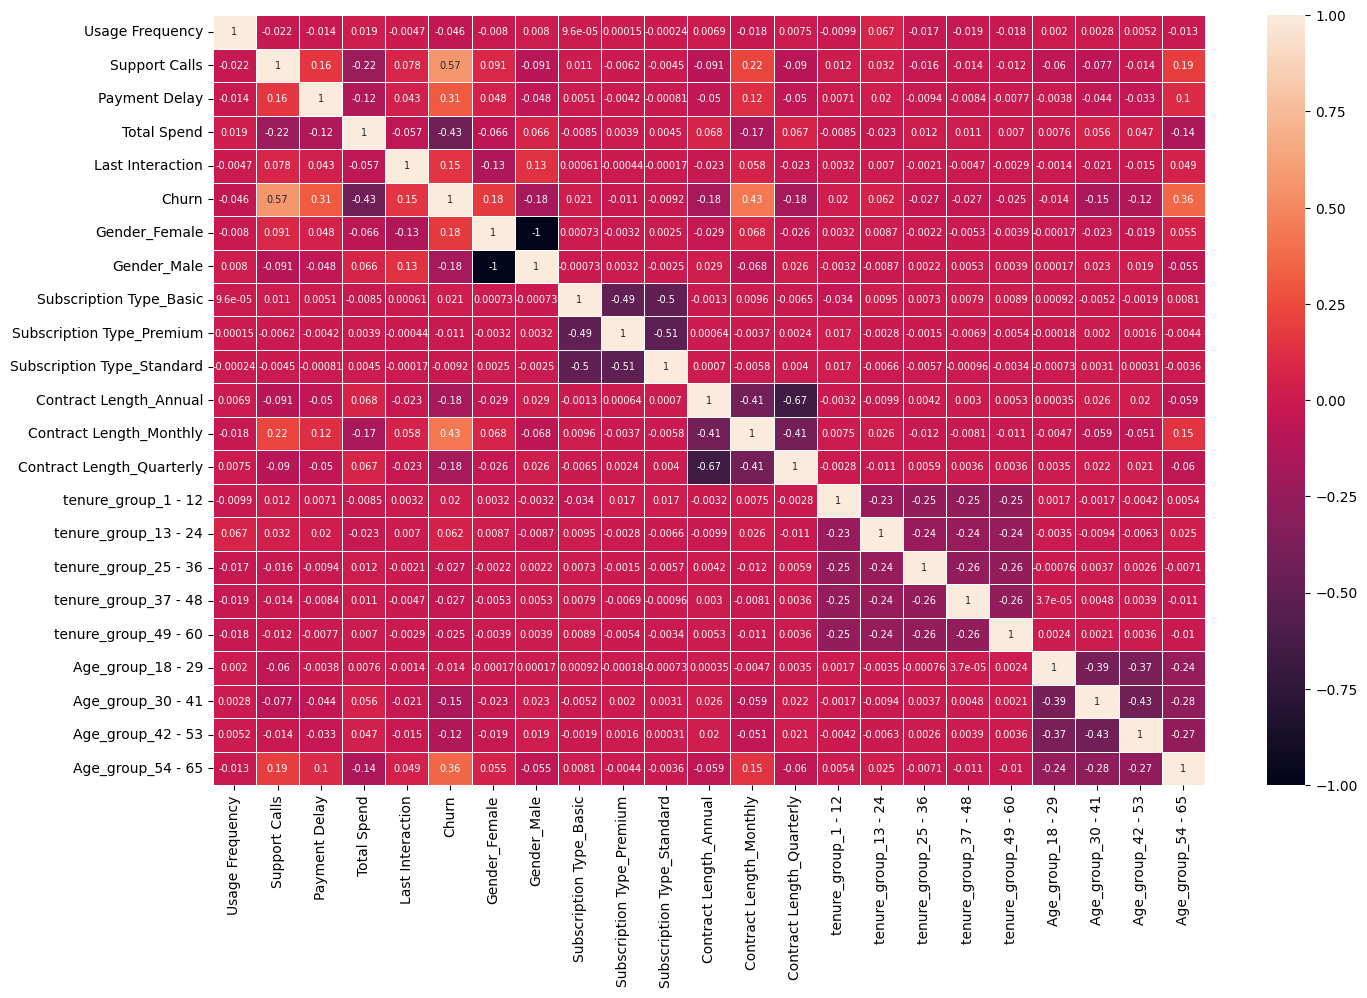

In [90]:
# Visual Representation of corelation using heatmap
plt.figure(figsize=(16,10))
sns.heatmap(copy_df_dummies.corr(), annot=True, annot_kws={"size": 7}, linewidths=.5)
plt.show()

In [91]:
# Save preprocessed file for model training
copy_df_dummies.to_csv(r'processed_data/preprocessed_training.csv', index = False)
print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!


<b>Insights</b><br>
<i>So the important factors which has a high corelation with Churn =></i>
1. payment delay
2. support calls
3. Female Gender

## <center>Overall Insights<a class="anchor" id="Overall Insights"></a></center>

#### Dataset Quality:<a class="anchor" id="Dataset Quality"></a>
- No missing data or outliers were found in the dataset.
- The dataset consists of **56.8% Female** and **43.2% Male** customers.
- **Female customers are slightly more likely to churn** than Male customers.

#### Demographic Insights:<a class="anchor" id="Demographic Insights"></a>
- The **age range** spans from **18 to 65**, with an **average age of 42**.
- **Older customers (above 53) tend to be retained**, while **younger customers show similar churn and retention rates**.
- **Female customers show a slightly higher churn rate consistently until age 54.**
- **Younger males** tend to have a **lower tendency to churn** compared to females.

#### Behavioral Patterns:<a class="anchor" id="Behavioral Patterns:"></a>
- **Usage frequency impacts churn**: Customers who use the service **≤5 times** have a **higher churn tendency**.
- **Spending influences retention**: Customers with **lower spending (0-600)** churn more, while **higher spenders (600-1000)** are more likely to stay.
- **Payment delays matter**: The **majority of customers** have a **payment delay of 0-20 days**, but delays **exceeding 20 days significantly increase churn**.
- **Last interaction impacts churn**: Customers who haven’t interacted in the **last 15 days show an increased churn tendency**.

#### Support Interactions:<a class="anchor" id="Support Interactions:"></a>
- Customers who make **fewer than 5 support calls** have **lower churn rates**.
- Customers with **5 or more support calls** show a **slightly higher churn rate**, indicating **frustration leading to churn**.

#### Subscription and Tenure Insights:<a class="anchor" id="Subscription and Tenure Insights"></a>
- **Subscription type has no significant impact on churn.**
- **Monthly contracts have the highest churn rates**, with no retained customers in this category.
- **Annual contract holders churn less**, suggesting that **long-term contracts improve retention**.
- **Tenure groups 25-36, 37-48, and 49-60 months show strong customer retention**, while **shorter tenure groups experience higher churn**.

#### Key Factors Influencing Churn:<a class="anchor" id="Key Factors Influencing Churn"></a>
- **High churn risk factors** include:
  - **High payment delays (20+ days)**
  - **Higher support call frequency (5+)**
  - **Low service usage (≤5 times)**
- **Subscription type does not impact churn, but shorter contracts correlate with higher churn.**
- **The last interaction date has some impact, as churn rates increase after 15 days of inactivity.**


### Summary of Key Trends with Recommendations<a class="anchor" id="Summary of Key Trends with Recommendations"></a>
- **Customers with high payment delays, high support calls, and low usage are at greater risk of churn.**
- **Targeting retention efforts toward customers with frequent support issues** and addressing their concerns **can help reduce churn**.
- **Offering incentives for longer contracts** (to move customers away from Monthly plans) **can improve retention**.
- **Providing proactive customer support to users with payment delays** may **reduce churn risk**.
- **Encouraging higher service usage through engagement strategies** may **increase retention rates**.